# DSC 106 Midterm Project

In [107]:
#import packages
import spotipy
import spotipy.util as util
import pandas as pd
import urllib.request
import sklearn.svm as svm
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [108]:
from spotipy.oauth2 import SpotifyClientCredentials

cid = '327b0432454145edac87d743da39068e'
secret = 'b7e14bf491b4434ab70f1868fc1fba75'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

In [109]:
#Spotify API authentication token. The first parameter is the Spotify user id.
#token = util.prompt_for_user_token('biggurlandyouknowit',
#                                   client_id = '327b0432454145edac87d743da39068e',
#                                   client_secret = 'b7e14bf491b4434ab70f1868fc1fba75',
#                                   redirect_uri = 'http://localhost:8888/callback')
#access the Spotify API
#sp = spotipy.Spotify(auth=token)

In [110]:
#access the playlist we made that contains our training tracks
training_playlist = sp.user_playlist('biggurlandyouknowit', 'spotify:playlist:1ZouLC1keHDTVeXRQDx6dq')

In [111]:
#basic info for the training tracks
training_tracks_df = pd.DataFrame()
for track_data in training_playlist['tracks']['items']:
    track_df = pd.DataFrame(pd.DataFrame(dict([(k,pd.Series(v)) for k,v in track_data.items()]))['track']).transpose()
    training_tracks_df = training_tracks_df.append(track_df)
training_tracks_df = training_tracks_df.drop(training_tracks_df.columns[0], axis = 1).reset_index(drop = True)
training_tracks_df

album  \
0   {'album_type': 'album', 'artists': [{'external...   
1   {'album_type': 'compilation', 'artists': [{'ex...   
2   {'album_type': 'album', 'artists': [{'external...   
3   {'album_type': 'album', 'artists': [{'external...   
4   {'album_type': 'compilation', 'artists': [{'ex...   
5   {'album_type': 'compilation', 'artists': [{'ex...   
6   {'album_type': 'album', 'artists': [{'external...   
7   {'album_type': 'album', 'artists': [{'external...   
8   {'album_type': 'compilation', 'artists': [{'ex...   
9   {'album_type': 'album', 'artists': [{'external...   
10  {'album_type': 'album', 'artists': [{'external...   
11  {'album_type': 'album', 'artists': [{'external...   
12  {'album_type': 'album', 'artists': [{'external...   
13  {'album_type': 'album', 'artists': [{'external...   
14  {'album_type': 'album', 'artists': [{'external...   
15  {'album_type': 'album', 'artists': [{'external...   
16  {'album_type': 'album', 'artists': [{'external...   
17  {'album_type': 'album', 'artists': [{'external...   
18  {'album_type': 'album', 'artists': [{'external...   
19  {'album_type': 'album', 'artists': [{'external...   
20  {'album_type': 'album', 'artists': [{'external...   
21  {'album_type': 'album', 'artists': [{'external...   
22  {'album_type': 'album', 'artists': [{'external...   
23  {'album_type': 'album', 'artists': [{'external...   
24  {'album_type': 'album', 'artists': [{'external...   
25  {'album_type': 'album', 'artists': [{'external...   
26  {'album_type': 'album', 'artists': [{'external...   
27  {'album_type': 'compilation', 'artists': [{'ex...   
28  {'album_type': 'album', 'artists': [{'external...   
29  {'album_type': 'album', 'artists': [{'external...   
30  {'album_type': 'album', 'artists': [{'external...   
31  {'album_type': 'album', 'artists': [{'external...   
32  {'album_type': 'album', 'artists': [{'external...   
33  {'album_type': 'album', 'artists': [{'external...   
34  {'album_type': 'compilation', 'artists': [{'ex...   

                                              artists  \
0   [{'external_urls': {'spotify': 'https://open.s...   
1   [{'external_urls': {'spotify': 'https://open.s...   
2   [{'external_urls': {'spotify': 'https://open.s...   
3   [{'external_urls': {'spotify': 'https://open.s...   
4   [{'external_urls': {'spotify': 'https://open.s...   
5   [{'external_urls': {'spotify': 'https://open.s...   
6   [{'external_urls': {'spotify': 'https://open.s...   
7   [{'external_urls': {'spotify': 'https://open.s...   
8   [{'external_urls': {'spotify': 'https://open.s...   
9   [{'external_urls': {'spotify': 'https://open.s...   
10  [{'external_urls': {'spotify': 'https://open.s...   
11  [{'external_urls': {'spotify': 'https://open.s...   
12  [{'external_urls': {'spotify': 'https://open.s...   
13  [{'external_urls': {'spotify': 'https://open.s...   
14  [{'external_urls': {'spotify': 'https://open.s...   
15  [{'external_urls': {'spotify': 'https://open.s...   
16  [{'external_urls': {'spotify': 'https://open.s...   
17  [{'external_urls': {'spotify': 'https://open.s...   
18  [{'external_urls': {'spotify': 'https://open.s...   
19  [{'external_urls': {'spotify': 'https://open.s...   
20  [{'external_urls': {'spotify': 'https://open.s...   
21  [{'external_urls': {'spotify': 'https://open.s...   
22  [{'external_urls': {'spotify': 'https://open.s...   
23  [{'external_urls': {'spotify': 'https://open.s...   
24  [{'external_urls': {'spotify': 'https://open.s...   
25  [{'external_urls': {'spotify': 'https://open.s...   
26  [{'external_urls': {'spotify': 'https://open.s...   
27  [{'external_urls': {'spotify': 'https://open.s...   
28  [{'external_urls': {'spotify': 'https://open.s...   
29  [{'external_urls': {'spotify': 'https://open.s...   
30  [{'external_urls': {'spotify': 'https://open.s...   
31  [{'external_urls': {'spotify': 'https://open.s...   
32  [{'external_urls': {'spotify': 'https://open.s...   
33  [{'external_urls': {'spotify': 'https://open.s...   


In [112]:
#audio features for the training tracks
training_audio_features_df = pd.DataFrame()
for index, row in training_tracks_df.iterrows():
    audio_feature = pd.DataFrame(sp.audio_features('spotify:track:' + row['id']))
    training_audio_features_df = training_audio_features_df.append(audio_feature)
training_audio_features_df = training_audio_features_df.reset_index(drop = True)
training_audio_features_df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.532   0.887    0    -3.757     1       0.0335        0.0778   
1         0.922   0.392    5   -12.083     0       0.1220        0.0444   
2         0.453   0.987    8    -4.485     1       0.0889        0.0195   
3         0.660   0.816    2    -6.610     1       0.0299        0.1680   
4         0.547   0.822    0    -7.201     1       0.0292        0.0745   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000214    0.2940    0.795  122.511  audio_features   
1          0.165000    0.1230    0.771  109.878  audio_features   
2          0.283000    0.2680    0.316  123.544  audio_features   
3          0.018100    0.0608    0.678  111.346  audio_features   
4          0.009430    0.0645    0.774  130.138  audio_features   

                       id                                   uri  \
0  37ZJ0p5Jm13JPevGcx4SkF  spotify:track:37ZJ0p5Jm13JPevGcx4SkF   
1  5HkFTCxSeJ3kGNyQJbT4rJ  spotify:track:5HkFTCxSeJ3kGNyQJbT4rJ   
2  0G21yYKMZoHa30cYVi1iA8  spotify:track:0G21yYKMZoHa30cYVi1iA8   
3  3fH4KjXFYMmljxrcGrbPj9  spotify:track:3fH4KjXFYMmljxrcGrbPj9   
4  6Fba9RZtC6vTY814JToDtP  spotify:track:6Fba9RZtC6vTY814JToDtP   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/37ZJ0p5Jm13J...   
1  https://api.spotify.com/v1/tracks/5HkFTCxSeJ3k...   
2  https://api.spotify.com/v1/tracks/0G21yYKMZoHa...   
3  https://api.spotify.com/v1/tracks/3fH4KjXFYMml...   
4  https://api.spotify.com/v1/tracks/6Fba9RZtC6vT...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/37ZJ...       249293   
1  https://api.spotify.com/v1/audio-analysis/5HkF...       215933   
2  https://api.spotify.com/v1/audio-analysis/0G21...       273480   
3  https://api.spotify.com/v1/audio-analysis/3fH4...       263040   
4  https://api.spotify.com/v1/audio-analysis/6Fba...       239560   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [113]:
#training tracks with BOTH basic track info and audio features combined
training_df = training_tracks_df.merge(training_audio_features_df, on = 'id')
training_df

album  \
0   {'album_type': 'album', 'artists': [{'external...   
1   {'album_type': 'compilation', 'artists': [{'ex...   
2   {'album_type': 'album', 'artists': [{'external...   
3   {'album_type': 'album', 'artists': [{'external...   
4   {'album_type': 'compilation', 'artists': [{'ex...   
5   {'album_type': 'compilation', 'artists': [{'ex...   
6   {'album_type': 'album', 'artists': [{'external...   
7   {'album_type': 'album', 'artists': [{'external...   
8   {'album_type': 'compilation', 'artists': [{'ex...   
9   {'album_type': 'album', 'artists': [{'external...   
10  {'album_type': 'album', 'artists': [{'external...   
11  {'album_type': 'album', 'artists': [{'external...   
12  {'album_type': 'album', 'artists': [{'external...   
13  {'album_type': 'album', 'artists': [{'external...   
14  {'album_type': 'album', 'artists': [{'external...   
15  {'album_type': 'album', 'artists': [{'external...   
16  {'album_type': 'album', 'artists': [{'external...   
17  {'album_type': 'album', 'artists': [{'external...   
18  {'album_type': 'album', 'artists': [{'external...   
19  {'album_type': 'album', 'artists': [{'external...   
20  {'album_type': 'album', 'artists': [{'external...   
21  {'album_type': 'album', 'artists': [{'external...   
22  {'album_type': 'album', 'artists': [{'external...   
23  {'album_type': 'album', 'artists': [{'external...   
24  {'album_type': 'album', 'artists': [{'external...   
25  {'album_type': 'album', 'artists': [{'external...   
26  {'album_type': 'album', 'artists': [{'external...   
27  {'album_type': 'compilation', 'artists': [{'ex...   
28  {'album_type': 'album', 'artists': [{'external...   
29  {'album_type': 'album', 'artists': [{'external...   
30  {'album_type': 'album', 'artists': [{'external...   
31  {'album_type': 'album', 'artists': [{'external...   
32  {'album_type': 'album', 'artists': [{'external...   
33  {'album_type': 'album', 'artists': [{'external...   
34  {'album_type': 'compilation', 'artists': [{'ex...   

                                              artists  \
0   [{'external_urls': {'spotify': 'https://open.s...   
1   [{'external_urls': {'spotify': 'https://open.s...   
2   [{'external_urls': {'spotify': 'https://open.s...   
3   [{'external_urls': {'spotify': 'https://open.s...   
4   [{'external_urls': {'spotify': 'https://open.s...   
5   [{'external_urls': {'spotify': 'https://open.s...   
6   [{'external_urls': {'spotify': 'https://open.s...   
7   [{'external_urls': {'spotify': 'https://open.s...   
8   [{'external_urls': {'spotify': 'https://open.s...   
9   [{'external_urls': {'spotify': 'https://open.s...   
10  [{'external_urls': {'spotify': 'https://open.s...   
11  [{'external_urls': {'spotify': 'https://open.s...   
12  [{'external_urls': {'spotify': 'https://open.s...   
13  [{'external_urls': {'spotify': 'https://open.s...   
14  [{'external_urls': {'spotify': 'https://open.s...   
15  [{'external_urls': {'spotify': 'https://open.s...   
16  [{'external_urls': {'spotify': 'https://open.s...   
17  [{'external_urls': {'spotify': 'https://open.s...   
18  [{'external_urls': {'spotify': 'https://open.s...   
19  [{'external_urls': {'spotify': 'https://open.s...   
20  [{'external_urls': {'spotify': 'https://open.s...   
21  [{'external_urls': {'spotify': 'https://open.s...   
22  [{'external_urls': {'spotify': 'https://open.s...   
23  [{'external_urls': {'spotify': 'https://open.s...   
24  [{'external_urls': {'spotify': 'https://open.s...   
25  [{'external_urls': {'spotify': 'https://open.s...   
26  [{'external_urls': {'spotify': 'https://open.s...   
27  [{'external_urls': {'spotify': 'https://open.s...   
28  [{'external_urls': {'spotify': 'https://open.s...   
29  [{'external_urls': {'spotify': 'https://open.s...   
30  [{'external_urls': {'spotify': 'https://open.s...   
31  [{'external_urls': {'spotify': 'https://open.s...   
32  [{'external_urls': {'spotify': 'https://open.s...   
33  [{'external_urls': {'spotify': 'https://open.s...   


In [114]:
#extract release date as a column
def getReleaseDate(x):
    return x['album']['release_date']
training_df['release_date'] = training_df.apply(getReleaseDate, axis = 1)

In [115]:
#create a decade column
def make_decade(x):
    year = int(x[0:4])
    if year >= 1950 and year < 1960:
        return 0
    if year >= 1960 and year < 1970:
        return 1
    if year >= 1970 and year < 1980:
        return 2
    if year >= 1980 and year < 1990:
        return 3
    if year >= 1990 and year < 2000:
        return 4
    if year >= 2000 and year < 2010:
        return 5
    if year >= 2010 and year < 2020:
        return 6
    if year >= 2020 and year < 2030:
        return 7
training_df['decade'] = training_df['release_date'].apply(make_decade)

In [116]:
#dropping unneeded columns from our training dataset
training_df = training_df.drop(['episode','is_local','popularity','duration_ms_y', 'external_ids', 'track_number', 'track', 'track_href', 'key', 'type_y', 'uri_y', 'external_urls', 'href', 'id', 'type_x', 'uri_x', 'album', 'artists', 'available_markets', 'disc_number'], axis = 1)

In [117]:
#kept the features we will be using for our classifier
training_songs = training_df[['valence', 'energy', 'danceability', 'loudness', 'speechiness', 'tempo', 'instrumentalness']]
training_songs.head()

valence  energy  danceability  loudness  speechiness    tempo  \
0    0.795   0.887         0.532    -3.757       0.0335  122.511   
1    0.771   0.392         0.922   -12.083       0.1220  109.878   
2    0.316   0.987         0.453    -4.485       0.0889  123.544   
3    0.678   0.816         0.660    -6.610       0.0299  111.346   
4    0.774   0.822         0.547    -7.201       0.0292  130.138   

   instrumentalness  
0          0.000214  
1          0.165000  
2          0.283000  
3          0.018100  
4          0.009430

In [118]:
#what decade each song was created in
train_decade = [3,3,3,3,3,2,2,2,2,2,0,0,0,0,0,1,1,1,1,1,4,4,4,4,4,5,5,5,5,6,6,6,6,6,5]

In [119]:
classifier = LogisticRegression(C = 5)

In [120]:
#classfier based on valence, energy, danceability, loudness, speechiness, tempo, instrumentalness
classifier.fit(training_songs, train_decade)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
sol = classifier.predict(training_songs)

In [122]:
np.mean(train_decade == sol)

0.6285714285714286

In [123]:
#access the playlist we made that contains our testing tracks
test_playlist = sp.user_playlist('biggurlandyouknowit', 'spotify:playlist:6hvbipGQk0VYCjr5oXORBh')

In [124]:
#basic info for the test tracks
test_tracks_df = pd.DataFrame()
for track_data in test_playlist['tracks']['items']:
    track_df = pd.DataFrame(pd.DataFrame(dict([(k,pd.Series(v)) for k,v in track_data.items()]))['track']).transpose()
    test_tracks_df = test_tracks_df.append(track_df)
test_tracks_df = test_tracks_df.drop(test_tracks_df.columns[0], axis = 1).reset_index(drop = True)
test_tracks_df

album  \
0   {'album_type': 'album', 'artists': [{'external...   
1   {'album_type': 'album', 'artists': [{'external...   
2   {'album_type': 'album', 'artists': [{'external...   
3   {'album_type': 'album', 'artists': [{'external...   
4   {'album_type': 'album', 'artists': [{'external...   
5   {'album_type': 'album', 'artists': [{'external...   
6   {'album_type': 'album', 'artists': [{'external...   
7   {'album_type': 'album', 'artists': [{'external...   
8   {'album_type': 'album', 'artists': [{'external...   
9   {'album_type': 'album', 'artists': [{'external...   
10  {'album_type': 'album', 'artists': [{'external...   
11  {'album_type': 'compilation', 'artists': [{'ex...   
12  {'album_type': 'compilation', 'artists': [{'ex...   
13  {'album_type': 'compilation', 'artists': [{'ex...   
14  {'album_type': 'album', 'artists': [{'external...   
15  {'album_type': 'album', 'artists': [{'external...   
16  {'album_type': 'album', 'artists': [{'external...   
17  {'album_type': 'album', 'artists': [{'external...   
18  {'album_type': 'album', 'artists': [{'external...   
19  {'album_type': 'album', 'artists': [{'external...   
20  {'album_type': 'album', 'artists': [{'external...   
21  {'album_type': 'album', 'artists': [{'external...   
22  {'album_type': 'album', 'artists': [{'external...   
23  {'album_type': 'album', 'artists': [{'external...   
24  {'album_type': 'album', 'artists': [{'external...   
25  {'album_type': 'album', 'artists': [{'external...   
26  {'album_type': 'album', 'artists': [{'external...   
27  {'album_type': 'album', 'artists': [{'external...   
28  {'album_type': 'album', 'artists': [{'external...   
29  {'album_type': 'compilation', 'artists': [{'ex...   
30  {'album_type': 'album', 'artists': [{'external...   
31  {'album_type': 'album', 'artists': [{'external...   
32  {'album_type': 'album', 'artists': [{'external...   
33  {'album_type': 'compilation', 'artists': [{'ex...   
34  {'album_type': 'album', 'artists': [{'external...   

                                              artists  \
0   [{'external_urls': {'spotify': 'https://open.s...   
1   [{'external_urls': {'spotify': 'https://open.s...   
2   [{'external_urls': {'spotify': 'https://open.s...   
3   [{'external_urls': {'spotify': 'https://open.s...   
4   [{'external_urls': {'spotify': 'https://open.s...   
5   [{'external_urls': {'spotify': 'https://open.s...   
6   [{'external_urls': {'spotify': 'https://open.s...   
7   [{'external_urls': {'spotify': 'https://open.s...   
8   [{'external_urls': {'spotify': 'https://open.s...   
9   [{'external_urls': {'spotify': 'https://open.s...   
10  [{'external_urls': {'spotify': 'https://open.s...   
11  [{'external_urls': {'spotify': 'https://open.s...   
12  [{'external_urls': {'spotify': 'https://open.s...   
13  [{'external_urls': {'spotify': 'https://open.s...   
14  [{'external_urls': {'spotify': 'https://open.s...   
15  [{'external_urls': {'spotify': 'https://open.s...   
16  [{'external_urls': {'spotify': 'https://open.s...   
17  [{'external_urls': {'spotify': 'https://open.s...   
18  [{'external_urls': {'spotify': 'https://open.s...   
19  [{'external_urls': {'spotify': 'https://open.s...   
20  [{'external_urls': {'spotify': 'https://open.s...   
21  [{'external_urls': {'spotify': 'https://open.s...   
22  [{'external_urls': {'spotify': 'https://open.s...   
23  [{'external_urls': {'spotify': 'https://open.s...   
24  [{'external_urls': {'spotify': 'https://open.s...   
25  [{'external_urls': {'spotify': 'https://open.s...   
26  [{'external_urls': {'spotify': 'https://open.s...   
27  [{'external_urls': {'spotify': 'https://open.s...   
28  [{'external_urls': {'spotify': 'https://open.s...   
29  [{'external_urls': {'spotify': 'https://open.s...   
30  [{'external_urls': {'spotify': 'https://open.s...   
31  [{'external_urls': {'spotify': 'https://open.s...   
32  [{'external_urls': {'spotify': 'https://open.s...   
33  [{'external_urls': {'spotify': 'https://open.s...   


In [125]:
#audio features for the test tracks
test_audio_features_df = pd.DataFrame()
for index, row in test_tracks_df.iterrows():
    audio_feature = pd.DataFrame(sp.audio_features('spotify:track:' + row['id']))
    test_audio_features_df = test_audio_features_df.append(audio_feature)
test_audio_features_df = test_audio_features_df.reset_index(drop = True)
test_audio_features_df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.434   0.897    0    -4.918     1       0.0488      0.010300   
1         0.502   0.912    1    -4.556     1       0.0564      0.000025   
2         0.418   0.383    4   -11.782     1       0.0257      0.071800   
3         0.638   0.906    2    -4.824     1       0.0504      0.066200   
4         0.270   0.944    4    -4.199     1       0.0975      0.005010   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000000    0.6120    0.684  148.726  audio_features   
1          0.000173    0.1060    0.720  116.761  audio_features   
2          0.017700    0.0896    0.352   87.773  audio_features   
3          0.000069    0.1420    0.767  107.991  audio_features   
4          0.000021    0.1160    0.606  146.347  audio_features   

                       id                                   uri  \
0  2m1hi0nfMR9vdGC8UcrnwU  spotify:track:2m1hi0nfMR9vdGC8UcrnwU   
1  5ghIJDpPoe3CfHMGu71E6T  spotify:track:5ghIJDpPoe3CfHMGu71E6T   
2  5jafMI8FLibnjkYTZ33m0c  spotify:track:5jafMI8FLibnjkYTZ33m0c   
3  5lWRaa0fBxDE5yU91npPq7  spotify:track:5lWRaa0fBxDE5yU91npPq7   
4  6hTcuIQa0sxrrByu9wTD7s  spotify:track:6hTcuIQa0sxrrByu9wTD7s   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2m1hi0nfMR9v...   
1  https://api.spotify.com/v1/tracks/5ghIJDpPoe3C...   
2  https://api.spotify.com/v1/tracks/5jafMI8FLibn...   
3  https://api.spotify.com/v1/tracks/5lWRaa0fBxDE...   
4  https://api.spotify.com/v1/tracks/6hTcuIQa0sxr...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2m1h...       167067   
1  https://api.spotify.com/v1/audio-analysis/5ghI...       301920   
2  https://api.spotify.com/v1/audio-analysis/5jaf...       257480   
3  https://api.spotify.com/v1/audio-analysis/5lWR...       209200   
4  https://api.spotify.com/v1/audio-analysis/6hTc...       269920   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [126]:
#test tracks with BOTH basic track info and audio features combined
test_df = test_tracks_df.merge(test_audio_features_df, on = 'id')
test_df

album  \
0   {'album_type': 'album', 'artists': [{'external...   
1   {'album_type': 'album', 'artists': [{'external...   
2   {'album_type': 'album', 'artists': [{'external...   
3   {'album_type': 'album', 'artists': [{'external...   
4   {'album_type': 'album', 'artists': [{'external...   
5   {'album_type': 'album', 'artists': [{'external...   
6   {'album_type': 'album', 'artists': [{'external...   
7   {'album_type': 'album', 'artists': [{'external...   
8   {'album_type': 'album', 'artists': [{'external...   
9   {'album_type': 'album', 'artists': [{'external...   
10  {'album_type': 'album', 'artists': [{'external...   
11  {'album_type': 'compilation', 'artists': [{'ex...   
12  {'album_type': 'compilation', 'artists': [{'ex...   
13  {'album_type': 'compilation', 'artists': [{'ex...   
14  {'album_type': 'album', 'artists': [{'external...   
15  {'album_type': 'album', 'artists': [{'external...   
16  {'album_type': 'album', 'artists': [{'external...   
17  {'album_type': 'album', 'artists': [{'external...   
18  {'album_type': 'album', 'artists': [{'external...   
19  {'album_type': 'album', 'artists': [{'external...   
20  {'album_type': 'album', 'artists': [{'external...   
21  {'album_type': 'album', 'artists': [{'external...   
22  {'album_type': 'album', 'artists': [{'external...   
23  {'album_type': 'album', 'artists': [{'external...   
24  {'album_type': 'album', 'artists': [{'external...   
25  {'album_type': 'album', 'artists': [{'external...   
26  {'album_type': 'album', 'artists': [{'external...   
27  {'album_type': 'album', 'artists': [{'external...   
28  {'album_type': 'album', 'artists': [{'external...   
29  {'album_type': 'compilation', 'artists': [{'ex...   
30  {'album_type': 'album', 'artists': [{'external...   
31  {'album_type': 'album', 'artists': [{'external...   
32  {'album_type': 'album', 'artists': [{'external...   
33  {'album_type': 'compilation', 'artists': [{'ex...   
34  {'album_type': 'album', 'artists': [{'external...   

                                              artists  \
0   [{'external_urls': {'spotify': 'https://open.s...   
1   [{'external_urls': {'spotify': 'https://open.s...   
2   [{'external_urls': {'spotify': 'https://open.s...   
3   [{'external_urls': {'spotify': 'https://open.s...   
4   [{'external_urls': {'spotify': 'https://open.s...   
5   [{'external_urls': {'spotify': 'https://open.s...   
6   [{'external_urls': {'spotify': 'https://open.s...   
7   [{'external_urls': {'spotify': 'https://open.s...   
8   [{'external_urls': {'spotify': 'https://open.s...   
9   [{'external_urls': {'spotify': 'https://open.s...   
10  [{'external_urls': {'spotify': 'https://open.s...   
11  [{'external_urls': {'spotify': 'https://open.s...   
12  [{'external_urls': {'spotify': 'https://open.s...   
13  [{'external_urls': {'spotify': 'https://open.s...   
14  [{'external_urls': {'spotify': 'https://open.s...   
15  [{'external_urls': {'spotify': 'https://open.s...   
16  [{'external_urls': {'spotify': 'https://open.s...   
17  [{'external_urls': {'spotify': 'https://open.s...   
18  [{'external_urls': {'spotify': 'https://open.s...   
19  [{'external_urls': {'spotify': 'https://open.s...   
20  [{'external_urls': {'spotify': 'https://open.s...   
21  [{'external_urls': {'spotify': 'https://open.s...   
22  [{'external_urls': {'spotify': 'https://open.s...   
23  [{'external_urls': {'spotify': 'https://open.s...   
24  [{'external_urls': {'spotify': 'https://open.s...   
25  [{'external_urls': {'spotify': 'https://open.s...   
26  [{'external_urls': {'spotify': 'https://open.s...   
27  [{'external_urls': {'spotify': 'https://open.s...   
28  [{'external_urls': {'spotify': 'https://open.s...   
29  [{'external_urls': {'spotify': 'https://open.s...   
30  [{'external_urls': {'spotify': 'https://open.s...   
31  [{'external_urls': {'spotify': 'https://open.s...   
32  [{'external_urls': {'spotify': 'https://open.s...   
33  [{'external_urls': {'spotify': 'https://open.s...   


In [127]:
#dropping uneeded columns
test_df = test_df.drop(['episode','is_local','popularity','duration_ms_y', 'external_ids', 'track_number', 'track', 'track_href', 'key', 'type_y', 'uri_y', 'external_urls', 'href', 'id', 'type_x', 'uri_x', 'album', 'artists', 'available_markets', 'disc_number'], axis = 1)

In [128]:
#creating a dataframe that's ready for our logistic regression
test_songs = test_df[['valence', 'energy', 'danceability', 'loudness', 'speechiness', 'tempo', 'instrumentalness']]

In [129]:
#creating a list containing the decades each songs were made in
test_decade = [4,4,4,4,2,2,2,2,2,1,1,1,1,1,3,3,3,3,3,5,5,5,5,5,6,6,6,6,6,0,0,0,0,0,0]

In [130]:
test_df['decade'] = test_decade

In [131]:
test_sol = classifier.predict(test_songs)

In [132]:
np.mean(test_decade == test_sol)

0.37142857142857144

In [133]:
test_df.head()

duration_ms_x explicit                     name  \
0        167066    False     All The Small Things   
1        301920    False  Smells Like Teen Spirit   
2        257480    False             High And Dry   
3        209200    False              Just A Girl   
4        269920    False              Born to Run   

                                         preview_url  url  danceability  \
0                                               None  NaN         0.434   
1                                               None  NaN         0.502   
2  https://p.scdn.co/mp3-preview/7cc3982631523940...  NaN         0.418   
3                                               None  NaN         0.638   
4  https://p.scdn.co/mp3-preview/bac7b351bb2f85c7...  NaN         0.270   

   energy  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.897    -4.918     1       0.0488      0.010300          0.000000   
1   0.912    -4.556     1       0.0564      0.000025          0.000173   
2   0.383   -11.782     1       0.0257      0.071800          0.017700   
3   0.906    -4.824     1       0.0504      0.066200          0.000069   
4   0.944    -4.199     1       0.0975      0.005010          0.000021   

   liveness  valence    tempo  \
0    0.6120    0.684  148.726   
1    0.1060    0.720  116.761   
2    0.0896    0.352   87.773   
3    0.1420    0.767  107.991   
4    0.1160    0.606  146.347   

                                        analysis_url  time_signature  decade  
0  https://api.spotify.com/v1/audio-analysis/2m1h...               4       4  
1  https://api.spotify.com/v1/audio-analysis/5ghI...               4       4  
2  https://api.spotify.com/v1/audio-analysis/5jaf...               4       4  
3  https://api.spotify.com/v1/audio-analysis/5lWR...               4       4  
4  https://api.spotify.com/v1/audio-analysis/6hTc...               4       2

In [134]:
training_df['decade'] = train_decade

In [135]:
training_df.head()

duration_ms_x explicit                         name  \
0        249293    False           Livin' On A Prayer   
1        215933    False   Another One Bites The Dust   
2        273480    False        Welcome To The Jungle   
3        263040    False  Don't You (Forget About Me)   
4        239560    False                         Jump   

                                         preview_url  url  danceability  \
0                                               None  NaN         0.532   
1                                               None  NaN         0.922   
2                                               None  NaN         0.453   
3                                               None  NaN         0.660   
4  https://p.scdn.co/mp3-preview/5c4fca39cd964267...  NaN         0.547   

   energy  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.887    -3.757     1       0.0335        0.0778          0.000214   
1   0.392   -12.083     0       0.1220        0.0444          0.165000   
2   0.987    -4.485     1       0.0889        0.0195          0.283000   
3   0.816    -6.610     1       0.0299        0.1680          0.018100   
4   0.822    -7.201     1       0.0292        0.0745          0.009430   

   liveness  valence    tempo  \
0    0.2940    0.795  122.511   
1    0.1230    0.771  109.878   
2    0.2680    0.316  123.544   
3    0.0608    0.678  111.346   
4    0.0645    0.774  130.138   

                                        analysis_url  time_signature  \
0  https://api.spotify.com/v1/audio-analysis/37ZJ...               4   
1  https://api.spotify.com/v1/audio-analysis/5HkF...               4   
2  https://api.spotify.com/v1/audio-analysis/0G21...               4   
3  https://api.spotify.com/v1/audio-analysis/3fH4...               4   
4  https://api.spotify.com/v1/audio-analysis/6Fba...               4   

  release_date  decade  
0   1986-08-16       3  
1   1981-10-26       3  
2   1987-07-21       3  
3         1985       3  
4   1996-09-24       3

In [136]:
test_df.head()

duration_ms_x explicit                     name  \
0        167066    False     All The Small Things   
1        301920    False  Smells Like Teen Spirit   
2        257480    False             High And Dry   
3        209200    False              Just A Girl   
4        269920    False              Born to Run   

                                         preview_url  url  danceability  \
0                                               None  NaN         0.434   
1                                               None  NaN         0.502   
2  https://p.scdn.co/mp3-preview/7cc3982631523940...  NaN         0.418   
3                                               None  NaN         0.638   
4  https://p.scdn.co/mp3-preview/bac7b351bb2f85c7...  NaN         0.270   

   energy  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.897    -4.918     1       0.0488      0.010300          0.000000   
1   0.912    -4.556     1       0.0564      0.000025          0.000173   
2   0.383   -11.782     1       0.0257      0.071800          0.017700   
3   0.906    -4.824     1       0.0504      0.066200          0.000069   
4   0.944    -4.199     1       0.0975      0.005010          0.000021   

   liveness  valence    tempo  \
0    0.6120    0.684  148.726   
1    0.1060    0.720  116.761   
2    0.0896    0.352   87.773   
3    0.1420    0.767  107.991   
4    0.1160    0.606  146.347   

                                        analysis_url  time_signature  decade  
0  https://api.spotify.com/v1/audio-analysis/2m1h...               4       4  
1  https://api.spotify.com/v1/audio-analysis/5ghI...               4       4  
2  https://api.spotify.com/v1/audio-analysis/5jaf...               4       4  
3  https://api.spotify.com/v1/audio-analysis/5lWR...               4       4  
4  https://api.spotify.com/v1/audio-analysis/6hTc...               4       2

In [137]:
training_df.drop('release_date', inplace = True, axis = 1)

In [138]:
training_viz_df = training_df[['valence', 'energy', 'danceability', 'loudness', 'speechiness', 'tempo', 'instrumentalness', 'decade']]

In [148]:
std_scal = StandardScaler()

In [149]:
std_scal.fit(training_viz_df.drop('decade', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [152]:
training_std_df = pd.DataFrame(std_scal.transform(training_viz_df.drop('decade', axis = 1)))

In [153]:
training_std_df.columns = ['valence', 'energy', 'danceability', 'loudness', 'speechiness', 'temp', 'instrumentalness']

In [154]:
training_std_df['decade'] = train_decade

In [166]:
decade_map = {0 : '50s',
              1 : '60s',
              2 : '70s',
              3 : '80s',
              4 : '90s',
              5 : '00s',
              6 : '10s',
              7 : '20s'}

In [167]:
training_std_df['decade'] = training_std_df['decade'].map(decade_map)

<Figure size 720x1080 with 0 Axes>

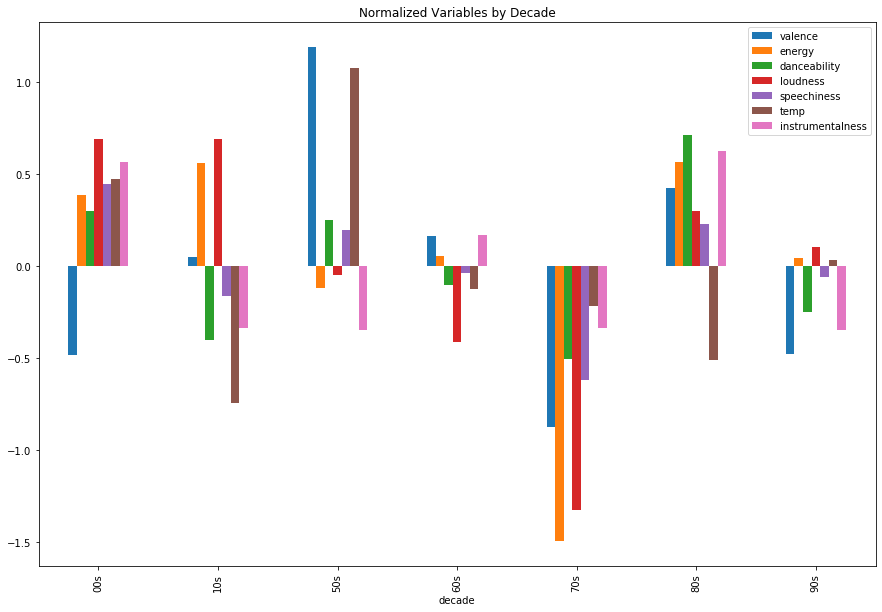

In [175]:
ax = plt.figure(figsize = [10, 15])
training_std_df.groupby('decade').mean().plot(kind = 'bar', figsize = [15, 10], title = 'Normalized Variables by Decade')